In [1]:
!pip install -Uqq fastbook
!pip install fastai --upgrade
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 1.2MB 10.6MB/s 
     |████████████████████████████████| 204kB 22.5MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [7]:
len(threes), len(sevens)

(6131, 6265)

In [75]:
Image.open(threes[1200])

In [9]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [10]:
seven_tensors[1].shape

torch.Size([28, 28])

In [11]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [12]:
stacked = torch.cat([stacked_threes, stacked_sevens])

In [13]:
stacked.shape

torch.Size([12396, 28, 28])

In [14]:
train_x = stacked.view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [15]:
x = torch.randn(28, 28)
x.shape

torch.Size([28, 28])

In [16]:
x.view(28*28).shape

torch.Size([784])

In [17]:
tensor([1]*len(threes) + [0]*len(sevens))

tensor([1, 1, 1,  ..., 0, 0, 0])

In [18]:
tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [19]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [20]:
dset = list(zip(train_x,train_y))
len(dset)

12396

In [21]:
dset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [22]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [23]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [24]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [25]:
weights = init_params((28*28,1))

In [26]:
bias = init_params(1)

In [27]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [28]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [29]:
dls = DataLoaders(dl, valid_dl)

In [30]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [31]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [32]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [33]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [34]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.341159,0.418041,0.504416,00:00
1,0.158235,0.244481,0.785083,00:00
2,0.086302,0.121028,0.911187,00:00
3,0.055837,0.080628,0.939156,00:00
4,0.041840,0.062523,0.953876,00:00
5,0.034761,0.052443,0.962709,00:00
6,0.030730,0.046141,0.964181,00:00
7,0.028130,0.041860,0.966143,00:00
8,0.026267,0.038756,0.968106,00:00
9,0.024828,0.036389,0.969087,00:00


In [44]:
dls = ImageDataLoaders.from_folder(path)
# learn = cnn_learner(dls, resnet18, pretrained=False,
#                     loss_func=F.cross_entropy, metrics=accuracy)
# learn.fit_one_cycle(1, 0.1)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.274476,0.193247,0.931796,01:41


epoch,train_loss,valid_loss,accuracy,time
0,0.052221,0.030229,0.989205,03:38


In [46]:
learn.export()

In [50]:
(path/'valid'/'7').ls()

(#1028) [Path('valid/7/9909.png'),Path('valid/7/4151.png'),Path('valid/7/8641.png'),Path('valid/7/2317.png'),Path('valid/7/1563.png'),Path('valid/7/3084.png'),Path('valid/7/5600.png'),Path('valid/7/1012.png'),Path('valid/7/8871.png'),Path('valid/7/86.png')...]

In [47]:
learn_inf = load_learner(path/'export.pkl')

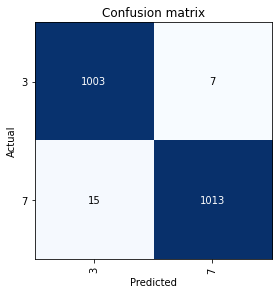

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [71]:
learn_inf.predict('/root/.fastai/data/mnist_sample/valid/3/2813.png')

('3', tensor(0), tensor([1.0000e+00, 4.0376e-06]))

In [51]:
learn_inf.predict('/root/.fastai/data/mnist_sample/valid/7/9909.png')

('7', tensor(1), tensor([7.9401e-07, 1.0000e+00]))

In [49]:
learn_inf.dls.vocab

['3', '7']

In [55]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [68]:
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    print(probs)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [78]:
btn_upload = widgets.FileUpload()
out_pl.clear_output()
lbl_pred.value = ""
widgets.VBox([widgets.Label('Select a digit!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

tensor([9.9996e-01, 3.9313e-05])


In [79]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.6MB 6.1MB/s 
     |████████████████████████████████| 389kB 21.0MB/s 
     |████████████████████████████████| 552kB 22.3MB/s 
     |████████████████████████████████| 122kB 32.5MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 430kB 26.1MB/s 
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalle

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
